In [57]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
sns.set()

In [4]:
df =pd.read_csv('/content/Advertising And Sales.csv')

In [5]:
df

,ID,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,12.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,11.0,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [6]:
df.info()#veri tipleri bilgisi

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         200 non-null    int64  
 1   TV         200 non-null    float64
 2   Radio      200 non-null    float64
 3   Newspaper  200 non-null    float64
 4   Sales      200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [7]:
df.head()

,ID,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,12.8,58.4,12.9


In [8]:
df.describe()#tanımlayıcı istatistikler

,ID,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.00000,200.000000,200.0000
mean,100.500000,147.032500,23.28950,30.554000,14.0380
std,57.879185,85.885186,14.86997,21.778621,5.2094
min,1.000000,0.700000,0.00000,0.300000,1.6000
25%,50.750000,74.375000,10.07500,12.750000,10.4000
50%,100.500000,149.750000,22.90000,25.750000,12.9000
75%,150.250000,218.825000,36.52500,45.100000,17.4000
max,200.000000,296.400000,49.60000,114.000000,27.0000


In [9]:
df.corr()#korelasyon tablosu

,ID,TV,Radio,Newspaper,Sales
ID,1.000000,0.017639,-0.110714,-0.154944,-0.049469
TV,0.017639,1.000000,0.056832,0.056801,0.783250
Radio,-0.110714,0.056832,1.000000,0.355082,0.574929
Newspaper,-0.154944,0.056801,0.355082,1.000000,0.226872
Sales,-0.049469,0.783250,0.574929,0.226872,1.000000


In [34]:
# İlk sütunu ve son sütunu hariç tutarak X'i atama
X = df[['TV','Radio','Newspaper']]

# y sütununu atama ( y, 4. sütun)
y =df['Sales']


Text(0.5, 1.0, 'Tv reklamlarının satışlar üzerindeki etkisi')

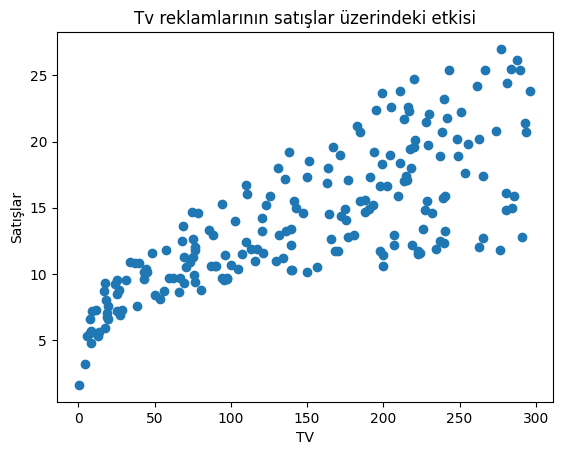

In [37]:
plt.scatter(X ['TV'],y)#saçılım grafiği önce yatay eksen sonra dikey eksen
plt.xlabel('TV')
plt.ylabel('Satışlar')
plt.title('Tv reklamlarının satışlar üzerindeki etkisi')

Text(0.5, 1.0, 'Radyo reklamlarının satışlar üzerindeki etkisi')

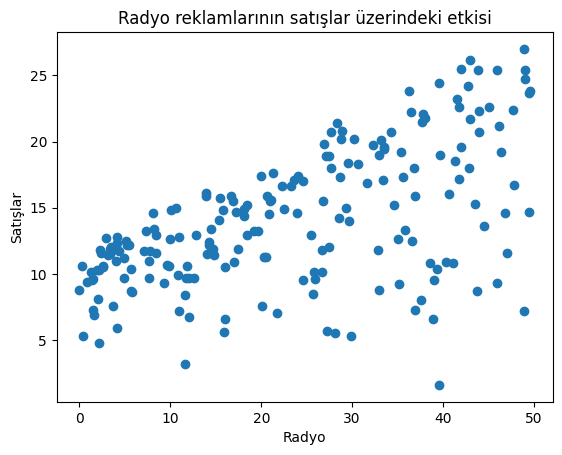

In [40]:
plt.scatter(X ['Radio'],y)#saçılım grafiği önce yatay eksen sonra dikey eksen
plt.xlabel('Radyo')
plt.ylabel('Satışlar')
plt.title('Radyo reklamlarının satışlar üzerindeki etkisi')

Text(0.5, 1.0, 'Gazete reklamlarının satışlar üzerindeki etkisi')

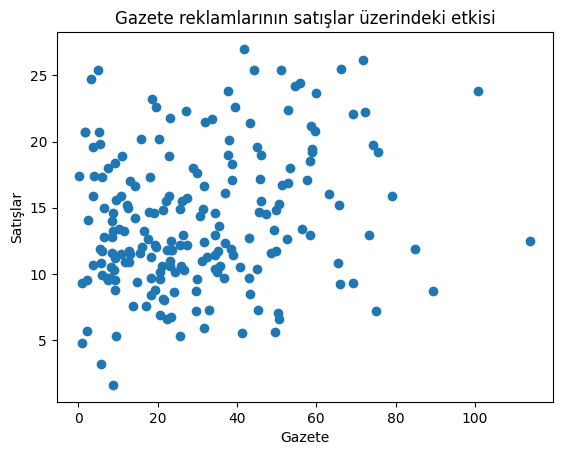

In [41]:
plt.scatter(X ['Newspaper'],y)#saçılım grafiği önce yatay eksen sonra dikey eksen
plt.xlabel('Gazete')
plt.ylabel('Satışlar')
plt.title('Gazete reklamlarının satışlar üzerindeki etkisi')

In [44]:
reg = LinearRegression()#doğrusal regresyon nesnesi
reg.fit(X,y)

LinearRegression()

In [45]:
reg.intercept_#sabit terim

3.0035563363190825

In [46]:
reg.coef_#katsayı

array([ 0.04568635,  0.18711007, -0.00132992])

In [47]:
reg.score(X,y)#modelin başarısı R-kare

0.895759007798162

In [50]:
X.shape#düzeltilmiş R-kare çoklu regresyon olduğundan dolayı gerekli  n=200 değişken sayısı(p) =3

(200, 3)

In [53]:
r2= reg.score(X,y)
n= X.shape[0]
p= X.shape[1]
duzeltilmis_r2 = 1-(1-r2)*(n-1)/(n-p-1)
duzeltilmis_r2 #düzeltilmiş r2


0.8941634824073175

In [75]:
reg.predict([[50,70,10]])#ürün için 50 bin dolar TV reklamına, 70 bin dolar radio reklamına ve 10 bin dolar gazete reklamına ödenen ücret kaç  ürün sattırır?

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([18.37227945])

In [74]:
odenekler =pd.DataFrame({'TV':[100,200,300],'Radio':[50,100,150],'Newspaper':[350,450,550]})
odenekler

,TV,Radio,Newspaper
0,100,50,350
1,200,100,450
2,300,150,550


In [76]:
reg.predict(odenekler).round(1)

array([16.5, 30.3, 44. ])

In [77]:
odenekler['Satış Sayısı'] = reg.predict(odenekler)
odenekler

,TV,Radio,Newspaper,Satış Sayısı
0,100,50,350,16.462221
1,200,100,450,30.253367
2,300,150,550,44.044513


In [78]:
from sklearn.feature_selection import f_regression

In [79]:
f_regression(X,y)#ilk array f istatistikler ikinci array p değerleri

(array([314.26376854,  97.76223273,  10.74422328]),
 array([9.72264902e-43, 5.44097735e-19, 1.23544146e-03]))

In [80]:
p_values = f_regression(X,y)[1]
p_values

array([9.72264902e-43, 5.44097735e-19, 1.23544146e-03])

In [82]:
p_values.round(3)#sonucu noktadan sonra 3 basamağa yuvarladğımızda modeldeki değişkenlerimiz anlamlıdır

array([0.   , 0.   , 0.001])

In [89]:
reg_summary = pd.DataFrame(data = X.columns.values, columns=['Ozellikler'])
reg_summary ['Katsayılar'] = reg.coef_
reg_summary ['P-değerleri'] =p_values.round(3)
reg_summary

,Ozellikler,Katsayılar,P-değerleri
0,TV,0.045686,0.000
1,Radio,0.187110,0.000
2,Newspaper,-0.001330,0.001
